# Health Insurance Lead Prediction -

# Project Methodology
FinMan Company is looking to leverage their client base by cross selling insurance products to existing customers. Insurance policies are offered to prospective and existing clients based on website landing and consumer election to fill out additional information forms. FinMan company would like to leverage their acquired information to classify positive leads for outreach programs using machine learning classifiers.When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.
        Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

# Data and Analytical Structure
Data includes demographic features, policy features (for current customers) and example positive classifications for ML model validation and interpretation. The source can be found here. The project analysis will follow the OSEMN framework: Obtain, Scrub, Explore, Model and Interpret.

# Data & Packages | Obtain

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',50)

In [10]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [11]:
traindf = pd.read_csv('train.csv.zip')
testdf = pd.read_csv('test.csv.zip')
traindf


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [12]:
testdf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


# Data Cleaning

# Dtecting Null Values

In [13]:
traindf.isnull().sum() # find NAN value 

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [14]:
testdf.isnull().sum()   # find NAN value

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [15]:
#'Policy Duration' and 'Policy Type' columns are tied to non existing. 
# Accounts and may be filled with zeros.
nonclients = ['Holding_Policy_Duration','Holding_Policy_Type']
for col in nonclients:
    traindf[col] = traindf[col].fillna(0)             

In [16]:
testdf[col] = testdf[col].fillna(0)

In [17]:
 traindf['Holding_Policy_Duration'] = traindf['Holding_Policy_Duration'].fillna(traindf['Holding_Policy_Duration'].mode()[0])

In [18]:
traindf['Health Indicator'] = traindf['Health Indicator'].fillna(traindf['Health Indicator'].mode()[0])

In [19]:
testdf['Holding_Policy_Duration'] = testdf['Holding_Policy_Duration'].fillna(testdf['Holding_Policy_Duration'].mode()[0])

In [20]:
testdf['Health Indicator'] = testdf['Health Indicator'].fillna(testdf['Health Indicator'].mode()[0])

In [21]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  object 
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [22]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         21805 non-null  object 
 9   Holding_Policy_Duration  21805 non-null  object 
 10  Holding_Policy_Type      21805 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


With many of these prospects not clearly identified as current clients, its safe to assume that null values in the 'Policy Duration' and 'Policy Type' columns are tied to non existing accounts and may be filled with zeros.

# Feature Engineering
    Convert to numerical: Holding_Policy_Duration

    Feature engineer long term customers
    Convert '14+' to '15' / convert to numerical
    Note: (after EDA) Convert to binary | Accomodation_Type, Reco_Insurance_Type, Is_Spouse

# Categorical Features

In [23]:
# converting 'Holding_Policy_Type' from float to int 
traindf['Long_Term_Cust'] = traindf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')
testdf['Long_Term_Cust'] = testdf['Holding_Policy_Duration'].apply(lambda x: 'Yes' if x == '14+' else 'No')

traindf['Holding_Policy_Duration'] = traindf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)
testdf['Holding_Policy_Duration'] = testdf['Holding_Policy_Duration'].replace('14+',15).astype(float).astype(int)

In [24]:
traindf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0,Yes
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0,No
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1.0,19,7450.0,1,No
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0,Yes
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0,No
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0,No
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0,Yes
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1,No


In [25]:
testdf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust
0,50883,C1,156,Owned,Individual,30,30,No,X1,6,3.0,5,11934.0,No
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8,No
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0,No
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0,No
4,50887,C1,951,Owned,Individual,75,75,No,X3,15,0.0,5,22534.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4,1.0,18,15884.0,No
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6,3.0,18,21390.0,No
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,15,0.0,1,17836.0,Yes
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3,1.0,19,11568.0,No


# Renaming Features

In [26]:
traindf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace=True)
testdf.rename(columns={'Is_Spouse':'Married','Health Indicator':'Health_Indicator'},inplace=True)


In [27]:
traindf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0,Yes
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0,No
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1.0,19,7450.0,1,No
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0,Yes
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0,No
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0,No
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0,Yes
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1,No


In [28]:
testdf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust
0,50883,C1,156,Owned,Individual,30,30,No,X1,6,3.0,5,11934.0,No
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8,No
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0,No
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0,No
4,50887,C1,951,Owned,Individual,75,75,No,X3,15,0.0,5,22534.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4,1.0,18,15884.0,No
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6,3.0,18,21390.0,No
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,15,0.0,1,17836.0,Yes
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3,1.0,19,11568.0,No


In [29]:
traindf['Avg_Age'] = (traindf['Upper_Age'] + traindf['Lower_Age']) / 2
testdf['Avg_Age'] = (testdf['Upper_Age'] + testdf['Lower_Age']) / 2

In [30]:
traindf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0,Yes,36.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0,No,48.5
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1.0,19,7450.0,1,No,32.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0,Yes,50.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0,No,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0,No,22.0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0,No,27.0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0,Yes,63.0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1,No,60.0


In [31]:
testdf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust,Avg_Age
0,50883,C1,156,Owned,Individual,30,30,No,X1,6,3.0,5,11934.0,No,30.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8,No,68.5
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0,No,28.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0,No,23.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,15,0.0,5,22534.0,Yes,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4,1.0,18,15884.0,No,45.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6,3.0,18,21390.0,No,59.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,15,0.0,1,17836.0,Yes,74.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3,1.0,19,11568.0,No,25.0


Typically, insurance products are priced and underwritten based on the age of the applicant or applicants. This is especially the case in most health insurance pricing. To reflect this and retain data, an average age feature will be created and the original two features will be dropped.

In [32]:
# feature engineering
traindf['Prim_Prem_Ratio'] = traindf['Reco_Policy_Premium'] / traindf['Upper_Age']
testdf['Prim_Prem_Ratio'] = testdf['Reco_Policy_Premium'] / testdf['Upper_Age']

In [33]:
traindf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,1,C3,3213,Rented,Individual,36,36,No,X1,15,3.0,22,11628.0,0,Yes,36.0,323.000000
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0,No,48.5,406.800000
2,3,C5,3732,Owned,Individual,32,32,No,X1,1,1.0,19,7450.0,1,No,32.0,232.812500
3,4,C24,4378,Owned,Joint,52,48,No,X1,15,3.0,19,17780.0,0,Yes,50.0,341.923077
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0,No,44.0,236.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,0,0.0,18,7704.0,0,No,22.0,350.181818
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0,No,27.0,200.296296
50879,50880,C1,442,Rented,Individual,63,63,No,X2,15,1.0,12,11374.0,0,Yes,63.0,180.539683
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1,No,60.0,396.890141


In [34]:
testdf

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,50883,C1,156,Owned,Individual,30,30,No,X1,6,3.0,5,11934.0,No,30.0,397.800000
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8,No,68.5,466.736232
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0,No,28.0,330.000000
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0,No,23.0,395.043478
4,50887,C1,951,Owned,Individual,75,75,No,X3,15,0.0,5,22534.0,Yes,75.0,300.453333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4,1.0,18,15884.0,No,45.0,352.977778
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6,3.0,18,21390.0,No,59.0,362.542373
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,15,0.0,1,17836.0,Yes,74.0,241.027027
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3,1.0,19,11568.0,No,25.0,462.720000


# Feature Selection

In [ ]:
#Drop features we are not going to use

In [35]:
#dataset = dataset.drop(''ID','Region_Code','Upper_Age','Lower_Age', axis = 1)
traindf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)
testdf2 = testdf.copy()
testdf.drop(['ID','Region_Code','Upper_Age','Lower_Age'],axis=1,inplace=True)

In [36]:
traindf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C3,Rented,Individual,No,X1,15,3.0,22,11628.0,0,Yes,36.0,323.000000
1,C5,Owned,Joint,No,X2,0,0.0,22,30510.0,0,No,48.5,406.800000
2,C5,Owned,Individual,No,X1,1,1.0,19,7450.0,1,No,32.0,232.812500
3,C24,Owned,Joint,No,X1,15,3.0,19,17780.0,0,Yes,50.0,341.923077
4,C8,Rented,Individual,No,X2,3,1.0,16,10404.0,0,No,44.0,236.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,No,X3,0,0.0,18,7704.0,0,No,22.0,350.181818
50878,C5,Rented,Individual,No,X3,7,3.0,4,5408.0,0,No,27.0,200.296296
50879,C1,Rented,Individual,No,X2,15,1.0,12,11374.0,0,Yes,63.0,180.539683
50880,C1,Owned,Joint,No,X2,2,2.0,16,28179.2,1,No,60.0,396.890141


In [37]:
testdf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C1,Owned,Individual,No,X1,6,3.0,5,11934.0,No,30.0,397.800000
1,C4,Owned,Joint,Yes,X1,3,3.0,18,32204.8,No,68.5,466.736232
2,C1,Rented,Individual,No,X3,2,4.0,17,9240.0,No,28.0,330.000000
3,C3,Rented,Individual,No,X3,3,3.0,18,9086.0,No,23.0,395.043478
4,C1,Owned,Individual,No,X3,15,0.0,5,22534.0,Yes,75.0,300.453333
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,C3,Owned,Individual,No,X1,4,1.0,18,15884.0,No,45.0,352.977778
21801,C4,Owned,Individual,No,X5,6,3.0,18,21390.0,No,59.0,362.542373
21802,C12,Owned,Individual,No,X3,15,0.0,1,17836.0,Yes,74.0,241.027027
21803,C10,Rented,Individual,No,X4,3,1.0,19,11568.0,No,25.0,462.720000


The unique 'ID' and 'Region Code' columns will be dropped in order to simplify the data. 'Region Code' consists of far too many categorical values which would need to be one hot encoded. The feature is dropped as the data still retains the 'City Code' feature to capture some level of geographical distinction. In addition, the upper and lower age features will be dropped being represented by average age.

In [38]:
numcols = traindf.select_dtypes('number').columns
for col in numcols:
    traindf[col] = traindf[col].astype(int)
    

In [39]:
testdf[col] = testdf[col].astype(int)

In [40]:
# copy for final analysis
df = traindf.copy()

In [41]:
df

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C3,Rented,Individual,No,X1,15,3,22,11628,0,Yes,36,323
1,C5,Owned,Joint,No,X2,0,0,22,30510,0,No,48,406
2,C5,Owned,Individual,No,X1,1,1,19,7450,1,No,32,232
3,C24,Owned,Joint,No,X1,15,3,19,17780,0,Yes,50,341
4,C8,Rented,Individual,No,X2,3,1,16,10404,0,No,44,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,Rented,Individual,No,X3,0,0,18,7704,0,No,22,350
50878,C5,Rented,Individual,No,X3,7,3,4,5408,0,No,27,200
50879,C1,Rented,Individual,No,X2,15,1,12,11374,0,Yes,63,180
50880,C1,Owned,Joint,No,X2,2,2,16,28179,1,No,60,396


In [42]:
vals = {'Rented':1,'Owned':2,'Individual':1,'Joint':2,'No':0,'Yes':1}
cols = ['Accomodation_Type','Reco_Insurance_Type','Married','Long_Term_Cust']

for col in cols:
    traindf[col] = traindf[col].replace(vals)

In [43]:
testdf[col] = testdf[col].replace(vals)

In [44]:
traindf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C3,1,1,0,X1,15,3,22,11628,0,1,36,323
1,C5,2,2,0,X2,0,0,22,30510,0,0,48,406
2,C5,2,1,0,X1,1,1,19,7450,1,0,32,232
3,C24,2,2,0,X1,15,3,19,17780,0,1,50,341
4,C8,1,1,0,X2,3,1,16,10404,0,0,44,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,1,1,0,X3,0,0,18,7704,0,0,22,350
50878,C5,1,1,0,X3,7,3,4,5408,0,0,27,200
50879,C1,1,1,0,X2,15,1,12,11374,0,1,63,180
50880,C1,2,2,0,X2,2,2,16,28179,1,0,60,396


In [62]:
testdf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,35,1,0,3,6,3.0,21,11934.0,0,30.0,397
1,16,1,1,3,3,3.0,18,32204.8,0,68.5,466
2,35,0,0,2,2,4.0,17,9240.0,0,28.0,330
3,24,0,0,2,3,3.0,18,9086.0,0,23.0,395
4,35,1,0,2,15,0.0,21,22534.0,1,75.0,300
...,...,...,...,...,...,...,...,...,...,...,...
21800,24,1,0,3,4,1.0,18,15884.0,0,45.0,352
21801,16,1,0,7,6,3.0,18,21390.0,0,59.0,362
21802,23,1,0,2,15,0.0,7,17836.0,1,74.0,241
21803,18,0,0,6,3,1.0,16,11568.0,0,25.0,462


Features 'Accommodation Type', 'Reco Insurance Type', 'Is Spouse' will be converted to binary 
(0 and 1).

In [46]:
ordinal = ['Holding_Policy_Type','Reco_Policy_Cat']
for col in ordinal:
    traindf[col] = traindf[col].astype('O')

In [47]:
testdf[col] = testdf[col].astype('O')
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Accomodation_Type        21805 non-null  object 
 2   Reco_Insurance_Type      21805 non-null  object 
 3   Married                  21805 non-null  object 
 4   Health_Indicator         21805 non-null  object 
 5   Holding_Policy_Duration  21805 non-null  int32  
 6   Holding_Policy_Type      21805 non-null  float64
 7   Reco_Policy_Cat          21805 non-null  object 
 8   Reco_Policy_Premium      21805 non-null  float64
 9   Long_Term_Cust           21805 non-null  int64  
 10  Avg_Age                  21805 non-null  float64
 11  Prim_Prem_Ratio          21805 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 1.8+ MB


In [48]:
traindf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C3,1,1,0,X1,15,3,22,11628,0,1,36,323
1,C5,2,2,0,X2,0,0,22,30510,0,0,48,406
2,C5,2,1,0,X1,1,1,19,7450,1,0,32,232
3,C24,2,2,0,X1,15,3,19,17780,0,1,50,341
4,C8,1,1,0,X2,3,1,16,10404,0,0,44,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,1,1,0,X3,0,0,18,7704,0,0,22,350
50878,C5,1,1,0,X3,7,3,4,5408,0,0,27,200
50879,C1,1,1,0,X2,15,1,12,11374,0,1,63,180
50880,C1,2,2,0,X2,2,2,16,28179,1,0,60,396


In [49]:
testdf

,City_Code,Accomodation_Type,Reco_Insurance_Type,Married,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Long_Term_Cust,Avg_Age,Prim_Prem_Ratio
0,C1,Owned,Individual,No,X1,6,3.0,5,11934.0,0,30.0,397
1,C4,Owned,Joint,Yes,X1,3,3.0,18,32204.8,0,68.5,466
2,C1,Rented,Individual,No,X3,2,4.0,17,9240.0,0,28.0,330
3,C3,Rented,Individual,No,X3,3,3.0,18,9086.0,0,23.0,395
4,C1,Owned,Individual,No,X3,15,0.0,5,22534.0,1,75.0,300
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,C3,Owned,Individual,No,X1,4,1.0,18,15884.0,0,45.0,352
21801,C4,Owned,Individual,No,X5,6,3.0,18,21390.0,0,59.0,362
21802,C12,Owned,Individual,No,X3,15,0.0,1,17836.0,1,74.0,241
21803,C10,Rented,Individual,No,X4,3,1.0,19,11568.0,0,25.0,462


The two feature that stand out are 'Holding Policy Type' and 'Reco Policy Cat' which are listed under numerical but most likely correspond to type and category of policy in existing customers.

# Exploratory Data Analysis

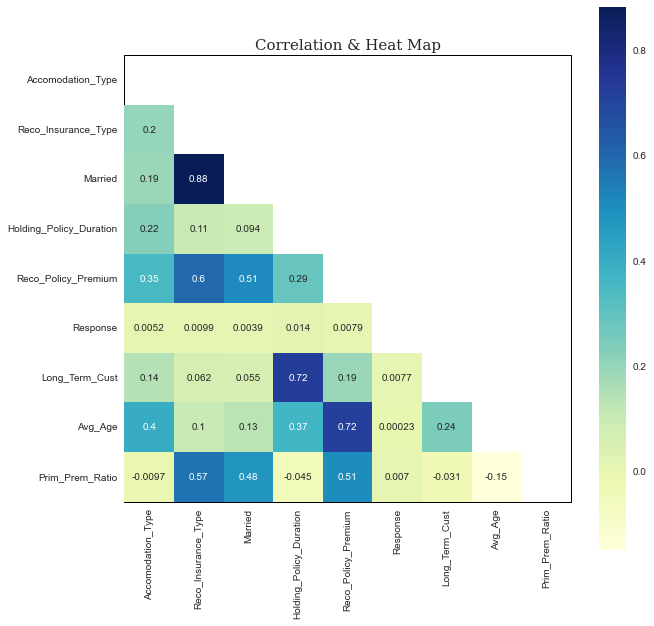

In [50]:
corr = traindf.corr() # analyzing correlation
fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='YlGnBu')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title('Correlation & Heat Map', fontsize=15, fontfamily='serif')
plt.show()

In [51]:
traindf.drop(['Married'],axis=1,inplace=True)
testdf.drop(['Married'],axis=1,inplace=True)

     Final feature selection due to multicollinearity. 

In [52]:
targetdf = df.groupby('Response').mean().head()
targetdf.style.background_gradient(cmap='Reds')

,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Avg_Age,Prim_Prem_Ratio
Response,,,,,,
0,3.668554,1.463915,14.707910,14154.494816,43.738888,317.916712
1,3.826194,1.482677,16.405275,14277.072406,43.748219,319.431649


Customers who elect to receive additional information typically hold existing policies longer and are classified under a larger policy category with a slightly larger premium. 

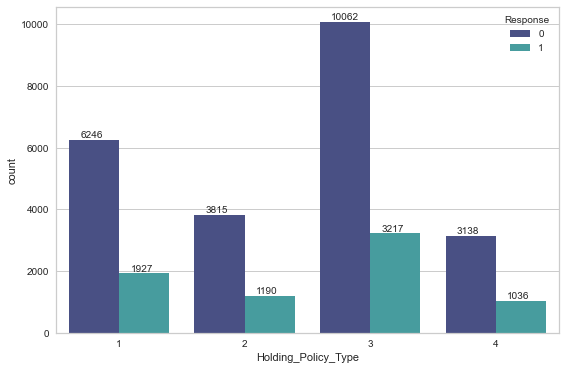

In [53]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.countplot(data=df[df['Holding_Policy_Type']!=0],x='Holding_Policy_Type',hue='Response',palette='mako');
for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x()+0.09, p.get_height()+75))
fig.savefig('policytypecount.jpg',dpi=200,bbox_inches='tight')

Holding Policy Type three has the highest number of positive responses but all four of the categories have approximately 30% positive to negative client responses.

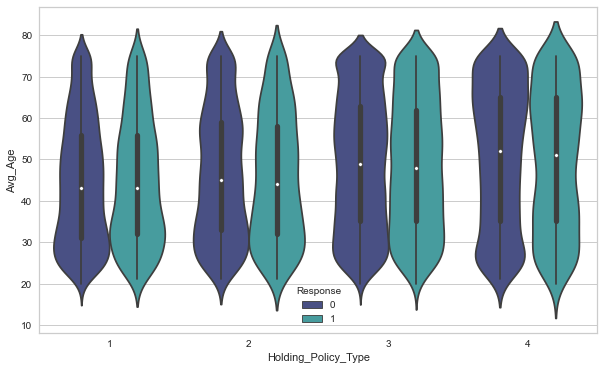

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df[df['Holding_Policy_Type']!=0],x='Holding_Policy_Type',y='Avg_Age',hue='Response',palette='mako');
fig.savefig('policytypexage.jpg',dpi=200,bbox_inches='tight')

In [55]:
traincat_vars = [var for var in traindf.columns if traindf[var].dtype == 'O']
testcat_vars = [var for var in testdf.columns if testdf[var].dtype == 'O']

The violin plot gives an interesting take on Average Age versus Holding Policy Type. HPT 3 shows a pretty even distribution across age groups while HPT 1 is heavily made up of younger individuals.

# Final Transformations

In [56]:
def replace_categories(df, var, target):
    # Order variable categories | lowest to highest against target (price)
    ordered_labels = df.groupby([var])[target].mean().sort_values().index
    # Dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    # Replace the categorical strings by integers using dictionary
    df[var] = df[var].map(ordinal_label)

In [57]:
for var in traincat_vars:
    replace_categories(traindf, var, 'Avg_Age')

In [58]:
for var in testcat_vars:
    replace_categories(testdf, var, 'Avg_Age')

With each of the categorical values mapped to values with respect to average age, the resulting values will end up on a similar scale as the rest of the dataset. In order to minimize data manipulation for modeling, no label encoding or standard scaling will occur.

In [59]:
# labelencoder = preprocessing.LabelEncoder()
# scaler = preprocessing.StandardScaler()

In [60]:
# traindf['City_Code'] = labelencoder.fit_transform(traindf['City_Code'])
# traindfscaled = scaler.fit_transform(traindf)

# Pycaret

In [61]:
! pip install pycaret 

In [2]:
! pip install preprocess

In [63]:
import pycaret
import preprocess as preprocess
from pycaret.datasets import get_data
from pycaret.classification import *


In [64]:
dataset = traindf.copy()
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (40706, 12)
Unseen Data For Predictions: (10176, 12)


In [65]:
clf = setup(data=data,target='Response',session_id=123,numeric_features=['Long_Term_Cust','Health_Indicator','Accomodation_Type','Reco_Insurance_Type','Holding_Policy_Duration','Holding_Policy_Type'])

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(40706, 12)"
4,Transformed data shape,"(40706, 12)"
5,Transformed train set shape,"(28494, 12)"
6,Transformed test set shape,"(12212, 12)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [66]:
#PREDICTION 01: By Using Logistic Regression Model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7596,0.6536,0.0335,0.5101,0.0629,0.0343,0.0799,0.1770
ada,Ada Boost Classifier,0.7594,0.6093,0.0007,0.3000,0.0015,0.0009,0.0106,0.3300
lr,Logistic Regression,0.7593,0.5045,0.0000,0.0000,0.0000,0.0000,0.0000,0.7160
nb,Naive Bayes,0.7593,0.5048,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280
ridge,Ridge Classifier,0.7593,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
lda,Linear Discriminant Analysis,0.7593,0.5082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0430
dummy,Dummy Classifier,0.7593,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200
gbc,Gradient Boosting Classifier,0.7582,0.6365,0.0104,0.4394,0.0202,0.0084,0.0332,0.8470
qda,Quadratic Discriminant Analysis,0.7581,0.5282,0.0017,0.2631,0.0035,-0.0005,-0.0003,0.0280
svm,SVM - Linear Kernel,0.7531,0.0000,0.0118,0.0406,0.0169,-0.0002,-0.0025,0.2830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# GridSearchCV

In [67]:
! pip install xgboost

In [68]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [69]:
def model_visuals (model, X_test, y_test):
    '''Plots the confusion matrix and ROC-AUC plot'''
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)  # confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize = 'true', 
                          cmap = 'Blues', ax = axes[0])
    axes[0].set_title('Confusion Matrix');
    # ROC-AUC Curve
    roc_auc = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].set_title('ROC-AUC Plot')
    axes[1].grid()
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [70]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   City_Code                50882 non-null  int64
 1   Accomodation_Type        50882 non-null  int64
 2   Reco_Insurance_Type      50882 non-null  int64
 3   Health_Indicator         50882 non-null  int64
 4   Holding_Policy_Duration  50882 non-null  int32
 5   Holding_Policy_Type      50882 non-null  int64
 6   Reco_Policy_Cat          50882 non-null  int64
 7   Reco_Policy_Premium      50882 non-null  int32
 8   Response                 50882 non-null  int32
 9   Long_Term_Cust           50882 non-null  int64
 10  Avg_Age                  50882 non-null  int32
 11  Prim_Prem_Ratio          50882 non-null  int32
dtypes: int32(5), int64(7)
memory usage: 3.7 MB


In [72]:
X_train, X_test, y_train, y_test = train_test_split(traindf.drop(columns=['Response'],axis=1),traindf['Response'],test_size=0.2, random_state=42)

In [73]:
gbclf = GradientBoostingClassifier(random_state=42)
gbclf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
param_grid = {
    'learning_rate': [0.1,0.2],
    'max_depth': [6],
    'subsample': [0.5,0.7,1],
    'n_estimators': [100]
}

In [75]:
grid_clf = GridSearchCV(gbclf,param_grid,scoring='roc_auc',cv=None,n_jobs=1)
grid_clf.fit(X_train,y_train)

best_parameters = grid_clf.best_params_

print('Grid search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name,best_parameters[param_name]))
    
training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy*100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy*100))

Grid search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
n_estimators: 100
subsample: 1

Training Accuracy: 77.45%
Validation Accuracy: 75.56%


Similar accuracy in the training and test sets suggests minimal under/over fitting.